In [1]:
# オクスブリッジ運河殺人事件
# 演習1：線型判別関数を求める
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Duplicate key in file PosixPath('/home/junya/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:   IPAexGothic')


In [16]:
# o_x1:オクス川の溶存酸素量、o_x2:オクス川の酸素要求量
# c_x1:ケンブ川の溶存酸素量、c_x2:ケンブ川の酸素要求量
o_x1 = np.array([6.5, 7.5, 8.6, 7.9, 8.2, 7.5, 5.9])
o_x2 = np.array([3.5, 4.5, 4.7, 3.9, 5.6, 5.2, 4.9])
c_x1 = np.array([3.9, 4.9, 5.1, 2.9, 2.5, 5.2, 3.6])
c_x2 = np.array([6.2, 4.5, 6.1, 5.8, 4.6, 6.7, 4.8])
N_o = 7
N_c = 7
p = 2
print(np.sum(o_x1), np.sum(o_x2), np.sum(c_x1), np.sum(c_x2))

52.1 32.3 28.1 38.699999999999996


In [18]:
# 平方和積和行列の算出
# オクス川のグループ内平方和積和行列
o_w11 = np.sum(o_x1 * o_x1) - np.sum(o_x1) * np.sum(o_x1) / N_o
o_w12 = np.sum(o_x1 * o_x2) - np.sum(o_x1) * np.sum(o_x2) / N_o
o_w22 = np.sum(o_x2 * o_x2) - np.sum(o_x2) * np.sum(o_x2) / N_o
o_w = np.array([[o_w11, o_w12], [o_w12, o_w22]])
print(o_w)

# ケンブ川のグループ内平方和積和行列
c_w11 = np.sum(c_x1 * c_x1) - np.sum(c_x1) * np.sum(c_x1) / N_c
c_w12 = np.sum(c_x1 * c_x2) - np.sum(c_x1) * np.sum(c_x2) / N_c
c_w22 = np.sum(c_x2 * c_x2) - np.sum(c_x2) * np.sum(c_x2) / N_c
c_w = np.array([[c_w11, c_w12], [c_w12, c_w22]])
print(c_w)

# プールされたグループ内平方和積和行列
w = o_w + c_w
print(w)

[[5.39714286 1.15571429]
 [1.15571429 3.16857143]]
[[7.08857143 2.42714286]
 [2.42714286 4.67428571]]
[[12.48571429  3.58285714]
 [ 3.58285714  7.84285714]]


In [20]:
# プールされたグループ内分散共分散行列
s = w / ( N_o + N_c - 2)
print(s)

[[1.04047619 0.29857143]
 [0.29857143 0.65357143]]


In [28]:
# 線型判別関数の導出
a1 = (s[1][1] * ((np.sum(o_x1) / N_o ) - (np.sum(c_x1) / N_c )) - s[0][1] * ((np.sum(o_x2) / N_o ) - (np.sum(c_x2) / N_c ))) / (s[0][0] * s[1][1] - s[0][1] ** 2)
a2 = ( - s[0][1] * ((np.sum(o_x1) / N_o ) - (np.sum(c_x1) / N_c )) + s[0][0] * ((np.sum(o_x2) / N_o ) - (np.sum(c_x2) / N_c ))) / (s[0][0] * s[1][1] - s[0][1] ** 2)
a0 = - (a1 * (np.sum(o_x1) + np.sum(c_x1)) / (N_o + N_c) + a2 * (np.sum(o_x2) + np.sum(c_x2)) / (N_o + N_c))
print(a1, a2, a0)
print("z = " + str(a1) + " × x1 + " + str(a2) + " × x2" + " " + str(a0))

4.254321205119327 -3.3424112172020224 -7.420383159230457
z = 4.254321205119327 × x1 + -3.3424112172020224 × x2 -7.420383159230457


In [33]:
# 演習2:マハラノビス距離の算出
# 分散共分散行列とその行列式の算出
# オクス川の分散共分散行列と行列式
o_s = o_w / (N_o - 1)
c_s = c_w / (N_c - 1)
det_o_s = np.linalg.det(o_s)
det_c_s = np.linalg.det(c_s)
print(det_o_s , det_c_s)

0.4379321428571397 0.7567496031746177


In [53]:
# オクス川のマハラノビス距離の算出
# 以下左から、x1^2、x2^2, x1x2, x1, x2それぞれの係数及び定数項
o_a = o_s[1][1] / det_o_s
o_b = o_s[0][0] / det_o_s
o_c = - 2 * o_s[0][1] / det_o_s
o_d = 2 * (o_s[0][1] * np.mean(o_x2) - o_s[1][1] * np.mean(o_x1)) / det_o_s
o_e = 2 * (o_s[0][1] * np.mean(o_x1) - o_s[0][0] * np.mean(o_x2)) / det_o_s
o_f = (o_s[1][1] * np.mean(o_x1) ** 2 + o_s[0][0] * np.mean(o_x2) ** 2 - 2 * o_s[0][1] * np.mean(o_x1) * np.mean(o_x2)) / det_o_s
print(o_a, o_b, o_c, o_d, o_e, o_f)

#print(o_s[1][1] / det_o_s)
#print(o_s[0][0] / det_o_s)
#print(- 2 * o_s[0][1] / det_o_s)
#print(2 * (o_s[0][1] * np.mean(o_x2) - o_s[1][1] * np.mean(o_x1)) / det_o_s)
#print(2 * (o_s[0][1] * np.mean(o_x1) - o_s[0][0] * np.mean(o_x2)) / det_o_s)
#print((o_s[1][1] * np.mean(o_x1) ** 2 + o_s[0][0] * np.mean(o_x2) ** 2 - 2 * o_s[0][1] * np.mean(o_x1) * np.mean(o_x2)) / det_o_s)

# ケンブ川のマハラノビス距離の算出
# 以下左から、x1^2、x2^2, x1x2, x1, x2それぞれの係数及び定数項
c_a = c_s[1][1] / det_c_s
c_b = c_s[0][0] / det_c_s
c_c = - 2 * c_s[0][1] / det_c_s
c_d = 2 * (c_s[0][1] * np.mean(c_x2) - c_s[1][1] * np.mean(c_x1)) / det_c_s
c_e = 2 * (c_s[0][1] * np.mean(c_x1) - c_s[0][0] * np.mean(c_x2)) / det_c_s
c_f = (c_s[1][1] * np.mean(c_x1) ** 2 + c_s[0][0] * np.mean(c_x2) ** 2 - 2 * c_s[0][1] * np.mean(c_x1) * np.mean(c_x2)) / det_c_s
print(c_a, c_b, c_c, c_d, c_e, c_f)

#print(c_s[1][1] / det_c_s)
#print(c_s[0][0] / det_c_s)
#print(- 2 * c_s[0][1] / det_c_s)
#print(2 * (c_s[0][1] * np.mean(c_x2) - c_s[1][1] * np.mean(c_x1)) / det_c_s)
#print(2 * (c_s[0][1] * np.mean(c_x1) - c_s[0][0] * np.mean(c_x2)) / det_c_s)
#print((c_s[1][1] * np.mean(c_x1) ** 2 + c_s[0][0] * np.mean(c_x2) ** 2 - 2 * c_s[0][1] * np.mean(c_x1) * np.mean(c_x2)) / det_c_s)

1.205883712142854 2.0540255475543803 -0.8796753139076485 -13.891367166581194 -12.408423788203494 80.3237369812752
1.0294655137967323 1.5611882272186144 -1.069108745684975 -2.354493345338262 -12.970573290424703 40.58017495310293


In [59]:
# 判別得点と正答率の算出
o_z = a1 * o_x1 + a2 * o_x2 + a0
c_z = a1 * c_x1 + a2 * c_x2 + a0
print(o_z)
print(c_z)
# オクス川のデータはすべて正、ケンブ川のデータはすべて負。よって、オクス川、ケンブ川ともに正答率は100%である

[ 8.53426541  9.4461754  13.45744648 13.15335061  8.74754791  7.10648755
  1.30229699]
[-11.55148001  -1.61505973  -6.11205344 -14.46883672 -12.15967175
  -7.69206805  -8.14840066]


In [ ]:
# 演習4はこれまでの過程で各種行列は算出済のため省略

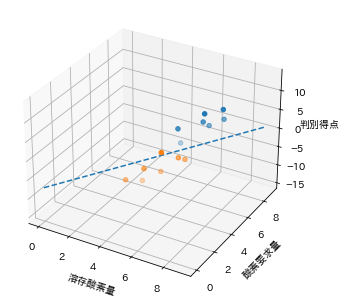

In [66]:
# 描画
fig = plt.figure()
ax = mplot3d.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter3D(o_x1, o_x2, o_z)
ax.scatter3D(c_x1, c_x2, c_z)
linex = np.arange(0, 10)
liney = np.arange(0, 10)
z = a1 * linex + a2 * liney + a0
ax.set_xlabel("溶存酸素量")
ax.set_ylabel("酸素要求量")
ax.set_zlabel("判別得点")
ax.plot(linex, liney, z,"--")
plt.show()